In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


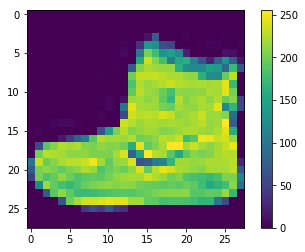

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

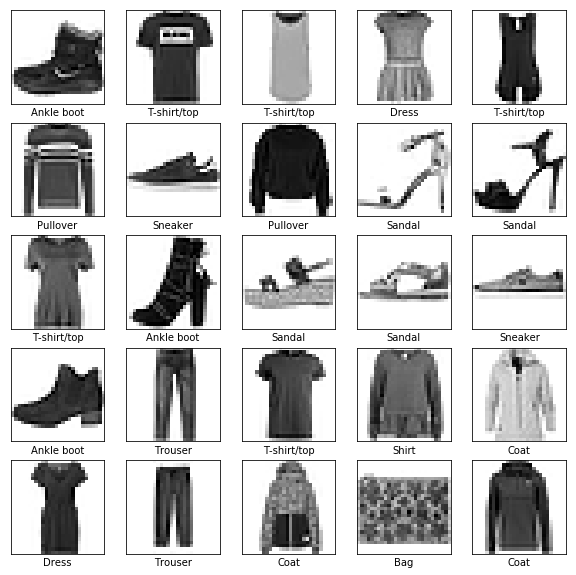

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images_ = train_images.reshape(len(train_images), 28, 28, 1)

test_images_ = test_images.reshape(len(test_images), 28, 28, 1)

train_images_.shape

(60000, 28, 28, 1)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(10, 3, input_shape=(28, 28, 1), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(15, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(25, 3, activation='relu'),
    keras.layers.GlobalMaxPooling2D(),
    #keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.build()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 15)        1365      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 25)          3400      
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images_, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 1.3888 - acc: 0.4954
Epoch 2/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.9877 - acc: 0.6513
Epoch 3/10
60000/60000 [==============================] - 59s 986us/sample - loss: 0.8990 - acc: 0.6854
Epoch 4/10
60000/60000 [==============================] - 59s 991us/sample - loss: 0.8549 - acc: 0.7024
Epoch 5/10
60000/60000 [==============================] - 59s 988us/sample - loss: 0.8236 - acc: 0.7157
Epoch 6/10
60000/60000 [==============================] - 59s 983us/sample - loss: 0.7965 - acc: 0.7278
Epoch 7/10
60000/60000 [==============================] - 59s 985us/sample - loss: 0.7730 - acc: 0.7381
Epoch 8/10
60000/60000 [==============================] - 59s 989us/sample - loss: 0.7548 - acc: 0.7443
Epoch 9/10
60000/60000 [==============================] - 58s 968us/sample - loss: 0.7345 - acc: 0.7513
Epoch 10/10
60000/60000 [==============================] - 58s 973us

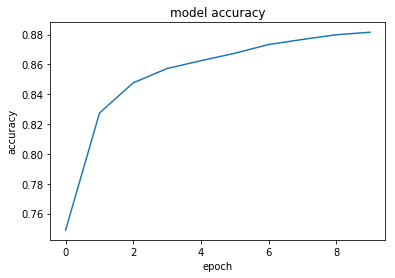

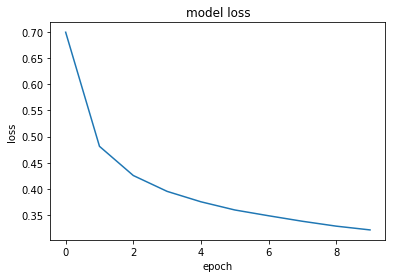

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images_, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.3630 - acc: 0.8680
Test accuracy: 0.868


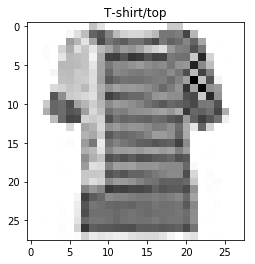

(1, 28, 28, 1)


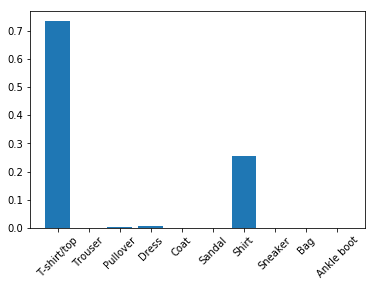

In [ ]:
from random import randrange

idx = randrange(len(test_images))
img = test_images[idx]
img_ = test_images_[idx]
plt.imshow(img, cmap=plt.cm.binary)
plt.title(class_names[test_labels[idx]])
plt.show()

#img_ = (np.expand_dims(img,0))
img_ = img_.reshape((1, 28, 28, 1))
print(img_.shape)
predictions_single = model.predict(img_)[0]


plt.bar(range(len(predictions_single)), predictions_single)
plt.xticks(range(10), class_names, rotation=45)
plt.show()